## Install packages

In [5]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



## Generating Random Networks

### 1.  Create random networks using Erdös-Rényi (ER) model

Probability : 0.003 
Mean : 3.144 
Variance : 3.180444 
Is connected? : FALSE 
gcc size : 937 
Probability : 0.004 
Mean : 4.116 
Variance : 4.174719 
Is connected? : FALSE 


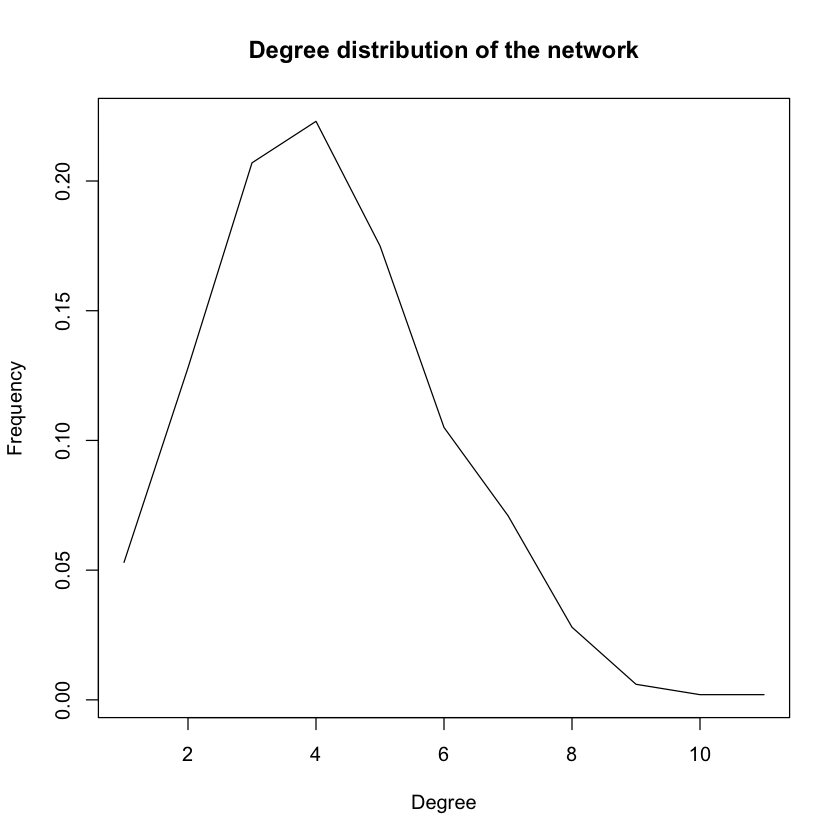

gcc size : 983 
Probability : 0.01 
Mean : 9.854 
Variance : 9.480164 
Is connected? : TRUE 


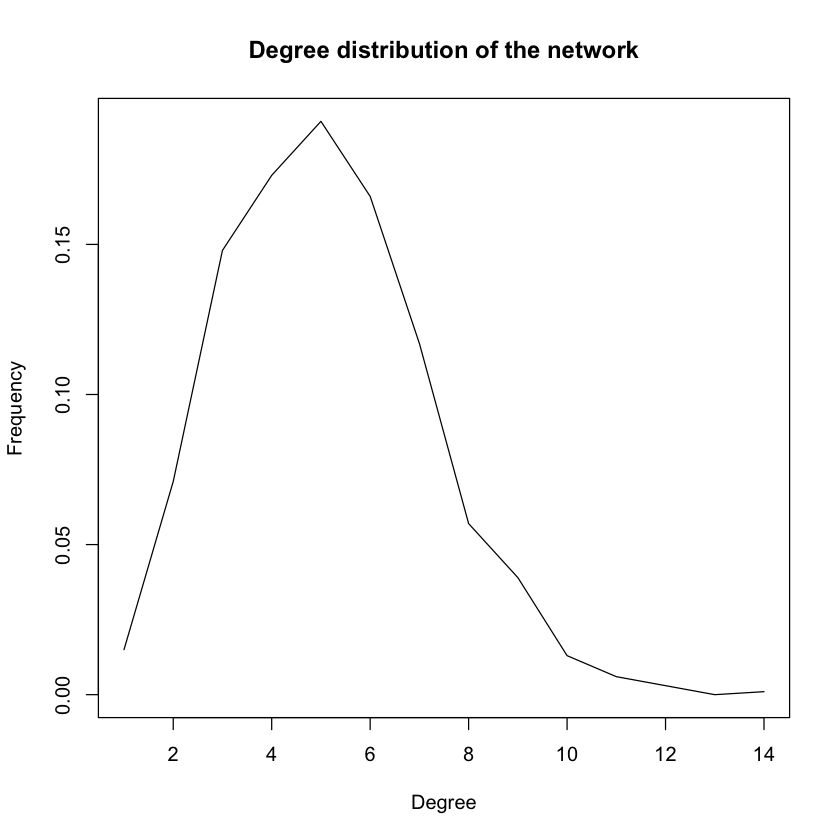

gcc size : 1000 
Probability : 0.05 
Mean : 50.34 
Variance : 49.7001 
Is connected? : TRUE 


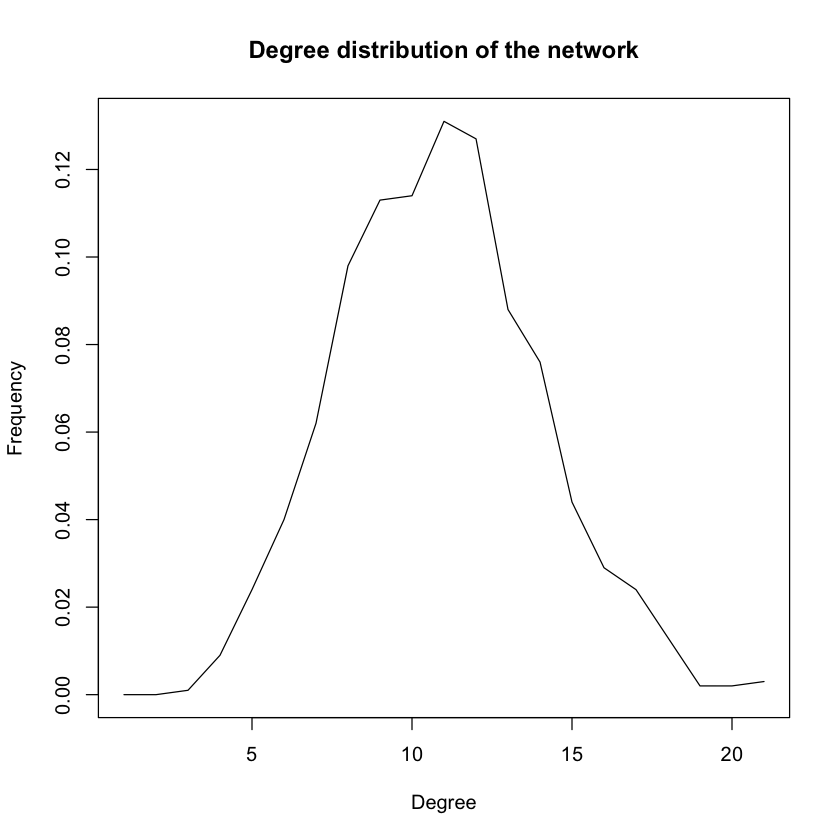

gcc size : 1000 
Probability : 0.1 
Mean : 99.236 
Variance : 96.90521 
Is connected? : TRUE 


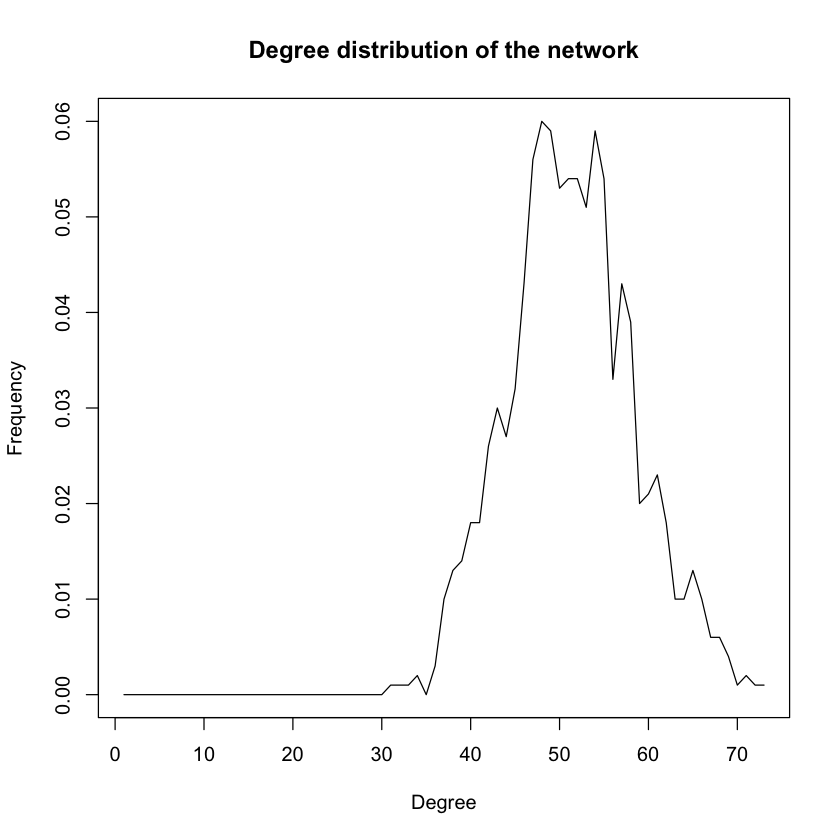

gcc size : 1000 


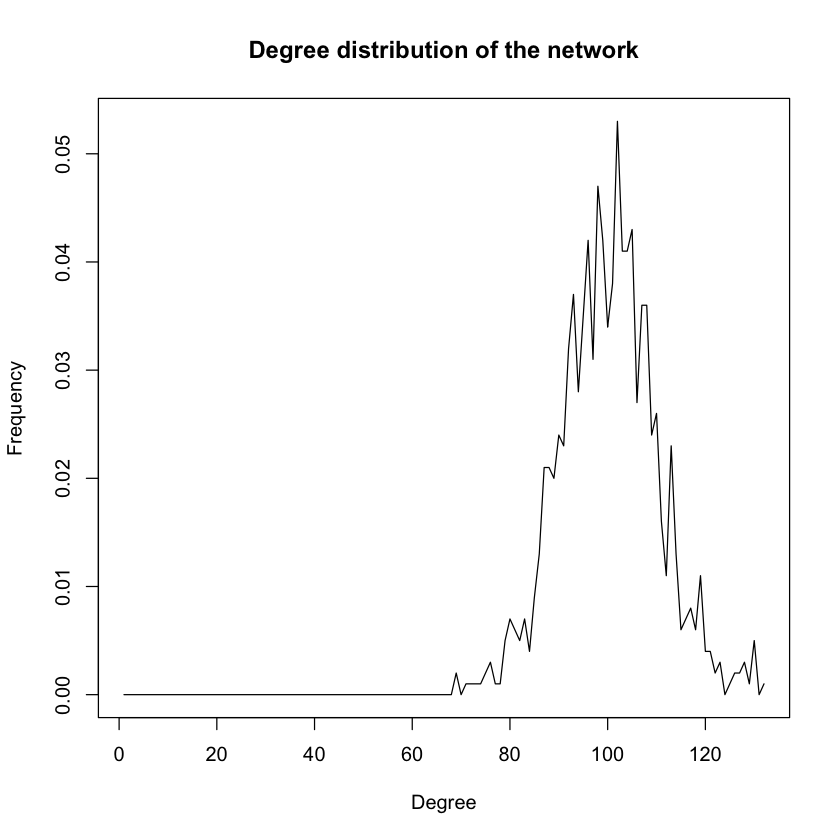

In [13]:
set.seed(12345)
pl = c(0.003,0.004,0.01,0.05,0.1)
gl_map = c()
for( p in pl){
    cat("Probability :",p,"\n")
    g = erdos.renyi.game(1000, p, directed=F)
    degreesVector <- degree(g)
    #hist(degreesVector)
    cat("Mean :",mean(degreesVector),"\n")
    cat("Variance :",var(degreesVector),"\n")
    cat("Is connected? :", is.connected(g),"\n")
    g.components <- clusters(g)
    #print(g.components$csize)
    # which is the largest component
    ix <- which.max(g.components$csize)
    plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",type='l')
    # get the subgraph correspondent to just the giant component
    g.giant <- induced.subgraph(g, which(g.components$membership == ix))
    cat("gcc size :",vcount(g.giant),"\n")
}

In [14]:
pl2 = c(0.001, 0.002, 0.0025, 0.003,0.004,0.006,0.008,0.01,0.05,0.1)

In [15]:
x = c()
for(p in pl2){
    x = c(x, rep(p,100))
}

In [74]:
cl = c()
set.seed(12345)
for( p in pl2){
    connected_c = 0
    for(i in 1:100){
        g = erdos.renyi.game(1000, p, directed=F)
        degreesVector <- degree(g)
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
       # print(vcount(g.giant)/1000)
        if(is.connected(g)){
            connected_c = connected_c+1
        }
        cl = c(cl,vcount(g.giant)/1000)
        
    }
    cat(p," ", connected_c/100,"\n")
    
}


0.001   0 
0.002   0 
0.0025   0 
0.003   0 
0.004   0 
0.006   0.05 
0.008   0.74 
0.01   0.94 
0.05   1 
0.1   1 


In [17]:
library('RColorBrewer')
colbox<-brewer.pal(n=10,name="Set3")
cols_ = c()
for(x_ in x){
    cols_ = c(cols_,colbox[match(x,pl2)])
}

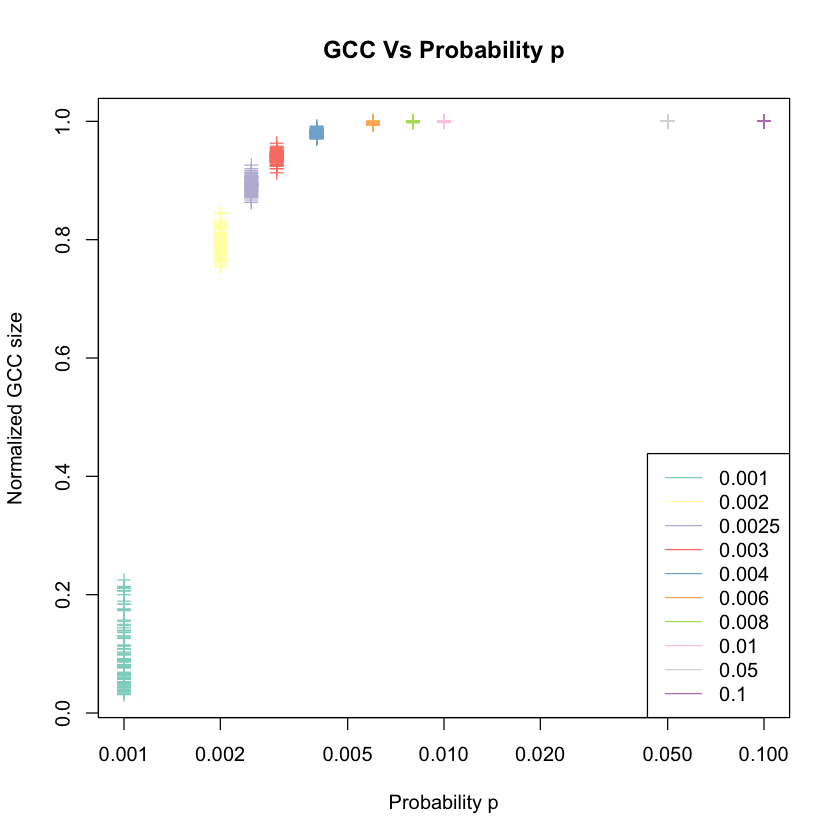

In [33]:
plot(x, cl, pch = 3,log='x',main="GCC Vs Probability p", col = cols_,ylab="Normalized GCC size", xlab="Probability p")
legend("bottomright", legend=pl2,col=colbox, lwd=1)


In [67]:
do_expected_gcc <- function(deg, plot_ = 'TRUE'){
    set.seed(12345)
    nrange <- 1:100
    iter <- 1:100
    cl =c()
    for(n in nrange){
        temp = c()
        p = deg/(n*100)
        for(i in iter){
        #cat("p ",p," n ",n,"\n")
        g = erdos.renyi.game(n*100, deg/(n*100), directed=F)
        degreesVector <- degree(g)
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
        #print(vcount(g.giant))
        temp = c(temp,vcount(g.giant))
        }
        cl = c(cl,mean(temp))
       # cat("p ",p," n ",n," m ",mean(temp),"\n")
        
    }
    if(plot_){
        plot(y = cl,x=nrange*100,main="Expected GCC size Vs Graph size",xlab="Graph Size",ylab="Expected GCC size",type='l')
    }
    else{
        return(cl)
    }
}

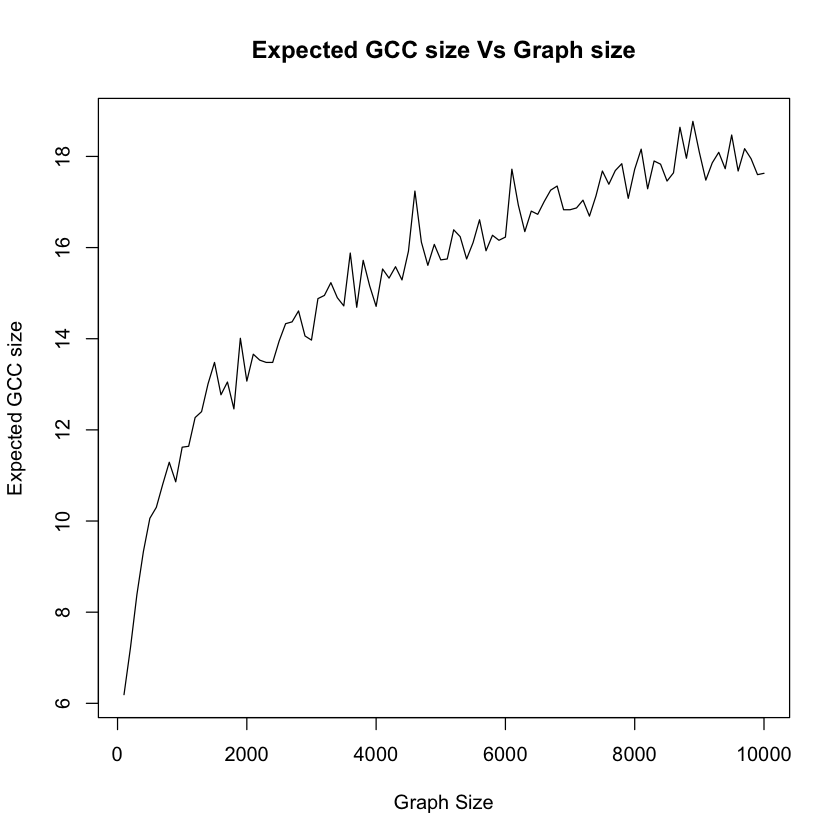

In [68]:
do_expected_gcc(0.5)

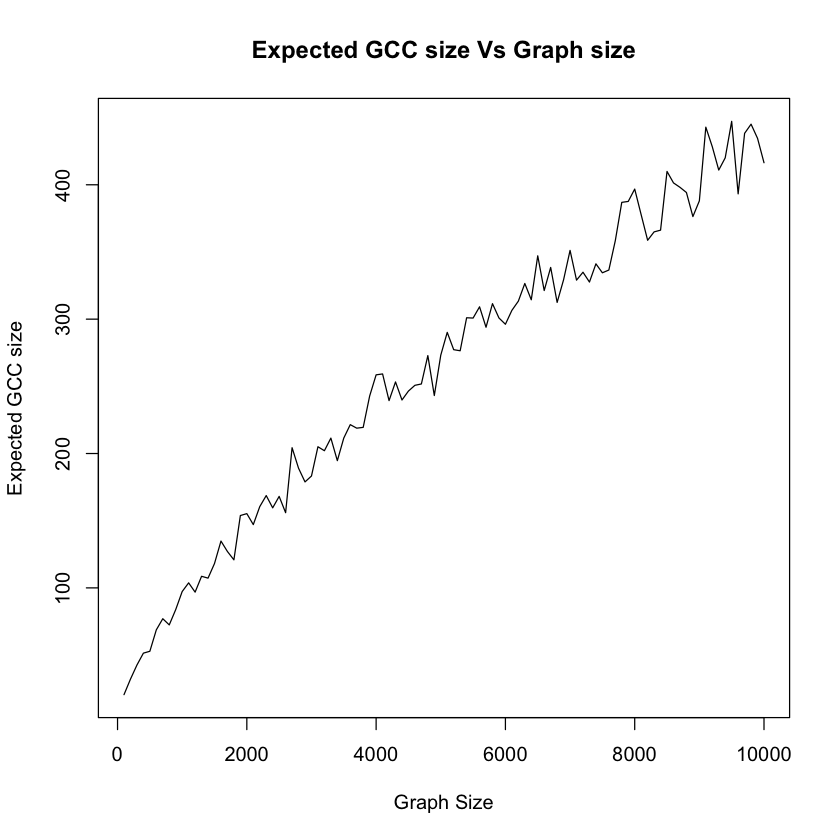

In [69]:
do_expected_gcc(1)

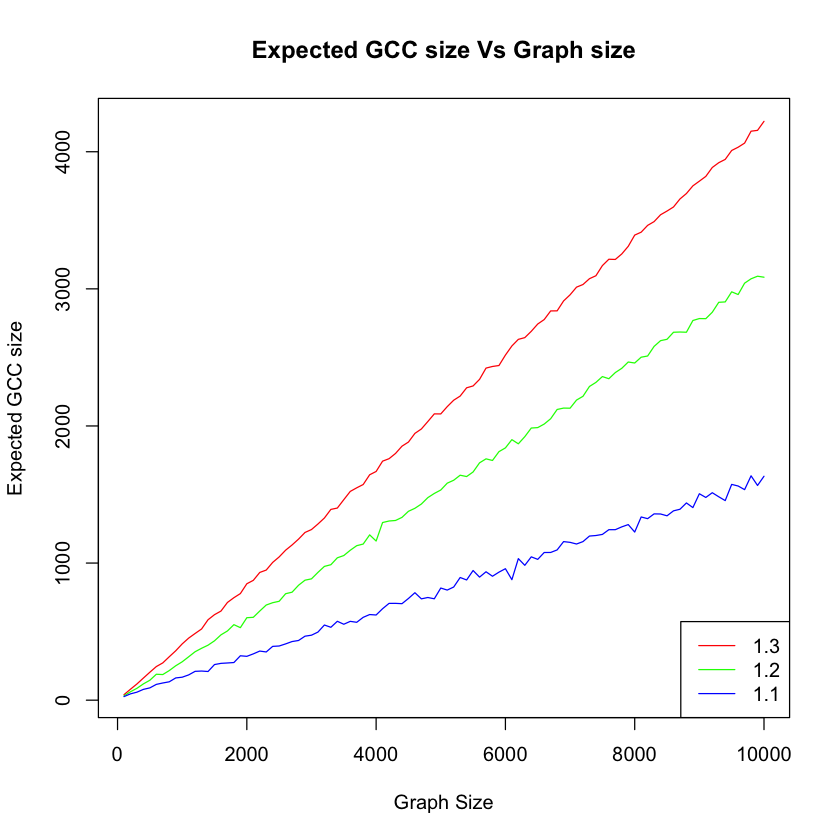

In [71]:
#lines(y = cl,x=nrange*100,main="Expected GCC size Vs Graph size",xlab="Graph Size",ylab="Expected GCC size",type='l')
plot(col='red',y = do_expected_gcc(1.3,'False'),x=c(1:100)*100,main="Expected GCC size Vs Graph size",xlab="Graph Size",ylab="Expected GCC size",type='l')
legend("bottomright", legend=c('1.3','1.2','1.1'),col=c('red','green','blue'), lwd=1)

lines(col='green',y = do_expected_gcc(1.2,'False'),x=c(1:100)*100,main="Expected GCC size Vs Graph size",xlab="Graph Size",ylab="Expected GCC size",type='l')
lines(col= 'blue',y = do_expected_gcc(1.1,'False'),x=c(1:100)*100,main="Expected GCC size Vs Graph size",xlab="Graph Size",ylab="Expected GCC size",type='l')

### 2. Create networks using preferential attachment model

In [79]:
##check if its simple_pa
set.seed(12345)
connected_cnt=0 
for(i in 1:1000){
    g = barabasi.game(1000, m=1, directed=F)
    if(is.connected(g)){
        connected_cnt = connected_cnt +1
    }
}
cat("isConnected probability",connected_cnt/1000,"\n")

isConnected probability 1 


In [81]:
set.seed(12345)
g = barabasi.game(1000, m=1, directed=F)
fg <- fastgreedy.community(g)
modularity(fg)
set.seed(12345)
g = barabasi.game(10000, m=1, directed=F)
fg <- fastgreedy.community(g)
modularity(fg)

[1] 0.9357195

[1] 0.9789493

[1] 1000


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“4 y values <= 0 omitted from logarithmic plot”

[1] 10000


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“99 y values <= 0 omitted from logarithmic plot”

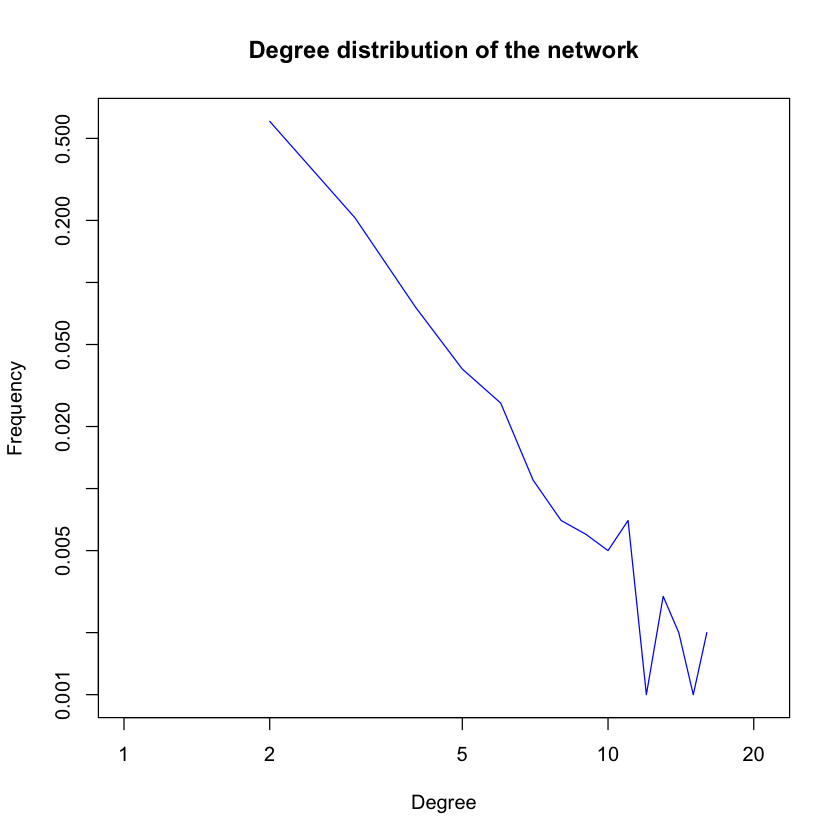

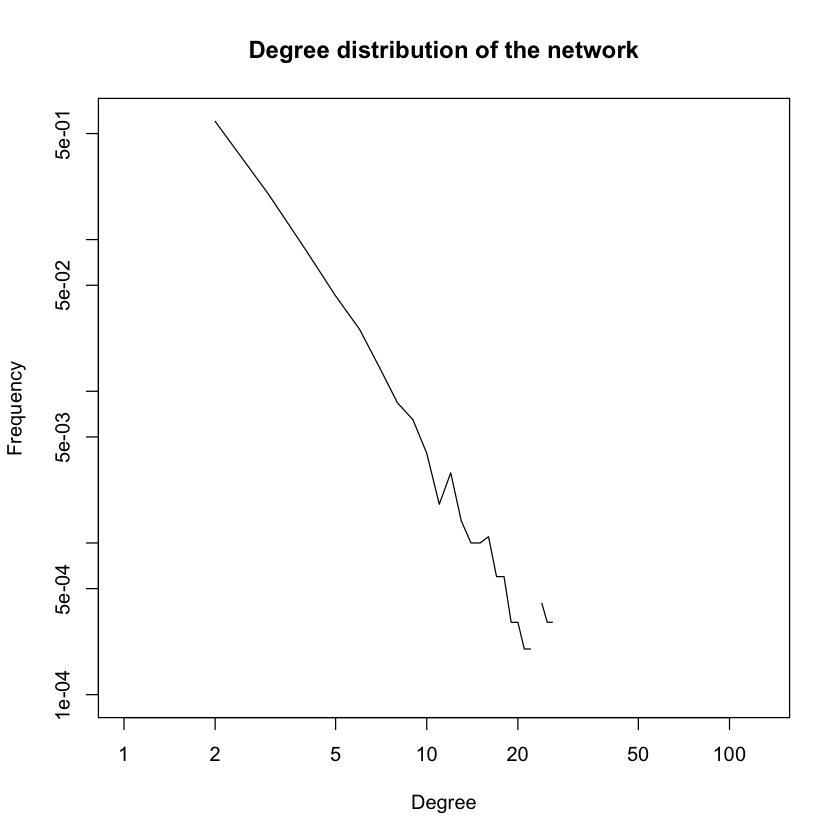

In [91]:
set.seed(234)
g = barabasi.game(1000, m=1, directed=F)
g.components <- clusters(g)
ix <- which.max(g.components$csize)
g.giant <- induced.subgraph(g, which(g.components$membership == ix))
print(vcount(g.giant))
fg <- fastgreedy.community(g)
plot(col='blue',degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy',type='l')
g = barabasi.game(10000, m=1, directed=F)
g.components <- clusters(g)
ix <- which.max(g.components$csize)
g.giant <- induced.subgraph(g, which(g.components$membership == ix))
print(vcount(g.giant))
fg <- fastgreedy.community(g)
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy',type='l')

In [14]:
fc <- cluster_fast_greedy(g)
membership(fc)
sizes(fc)

   [1]  9 24 21  6 28  2  4 29  3  2  3 27  7 18 15  1  3 21  8  6  7 11  2 13
  [25] 20 22  2 18 29 12 16 22 14 19 16  4  9 16 13 24 24 28 14  7 12 17 19 12
  [49] 31  6 12 28  5 22  9  6  6  4 27 31 21  5 15 12  2 24  7 16 18 10 25 10
  [73] 29 30 13 15  4  3 10  1  4  4  3  9 14  4  1  9 17 10 10 12 14 13  3  6
  [97] 11  6  9 22 21  8 26 13  8  9 26 12 10  3 15 18 13 14  9 23 28  4  5  4
 [121]  1  4 18  1 11 20 24 20 14  4 22  3  6 14 11  6 31 16 16  7  6 22 26 12
 [145] 12 13 10 24 11 10  4 16  5 16 23 11  7 11 30 17 24  9  5  7 14  9  9  4
 [169] 16 15  2  8  9  5 12 14 26 23 27  3 25  2 23  9  8 27  3 20 15 21  1 17
 [193] 11  6  9 23  6  2 14  9  1 26 12 15 13  9  6 30  7  5  3 14  4  4  3 11
 [217] 23 10  8 13 11  5 18  5 17 19 11 10  2  2  6  5 13  2  4 13 15  1 24 18
 [241] 19 17  8 20 19 27  6 22 21 16 26  4  4 11 17  4 24 15  3  1 26 17 20 15
 [265]  3 20 26  5 17  4  6  9 24 21 17  2 10 10 10 25  2  2 27 11 29 30  7 13
 [289] 15  7 11  7  2  1  1  8  9 27 27  5  8 10 12 

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
47 46 44 54 45 49 38 37 43 42 36 35 40 35 32 33 38 28 26 26 32 23 22 31 21 21 
27 28 29 30 31 
19 15 15 16 11 

### E  You can randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. How does this differ from the node degree distribution?

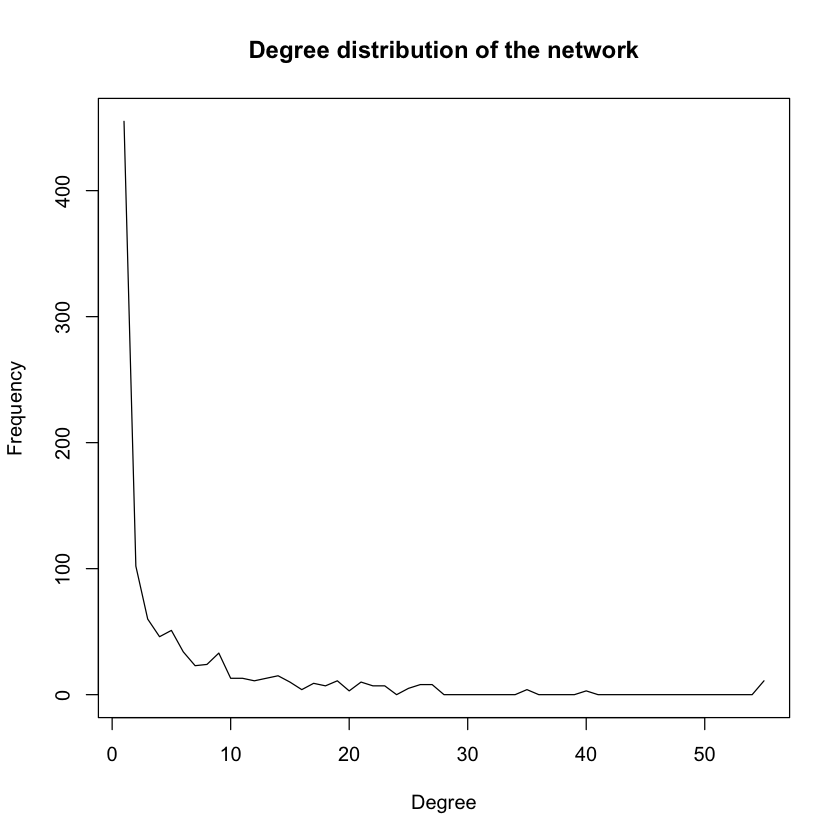

In [99]:
gsize = 10000
g = barabasi.game(gsize, m=1, directed=F)
degreesVector <- degree(g)
degreel = c()
for (v in sample(1:1000,1000)){
    neighs = neighbors(g,v)
    degree_ = 0
    if(length(neighs)>0){
        neigh2 = sample(neighs,1)
        degree_ = degree(g,neigh2)
    }
    degreel = c(degreel, degree_)
    
}
h <- hist(degreel, plot=F, breaks=max(degreel)-min(degreel)+1)
plot(h$counts,main="Degree distribution of the network",type = 'l',xlab="Degree",ylab="Frequency")


### F Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot

In [3]:
deg_dst_age <- function(mval){
    set.seed(12345)
    gsize =10000
    dg_sum = rep(0,gsize)
    modu = 0
    for(i in c(1:1000)){
       g = barabasi.game(gsize, m=mval, directed=F)
       dg_sum = dg_sum + degree(g)
        
    }
    fg <- fastgreedy.community(g)
    cat("Expected modularity :",modularity(fg)/1000,"\n")
    plot(dg_sum/1000, main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy')
    plot(dg_sum/1000,main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy', type='l')
}

Expected modularity : 0.0009769708 


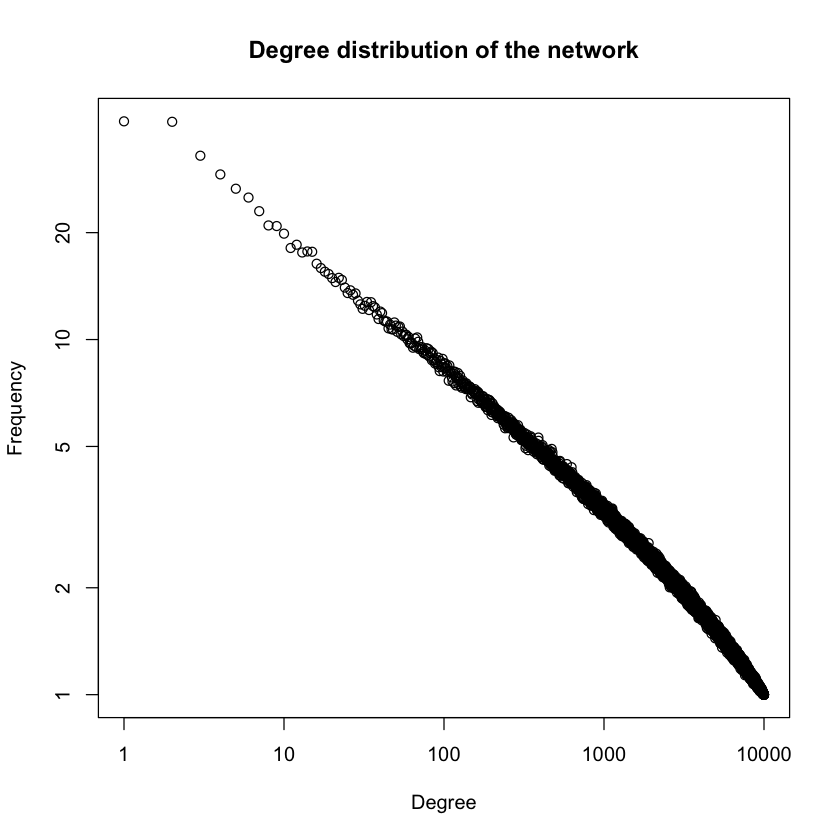

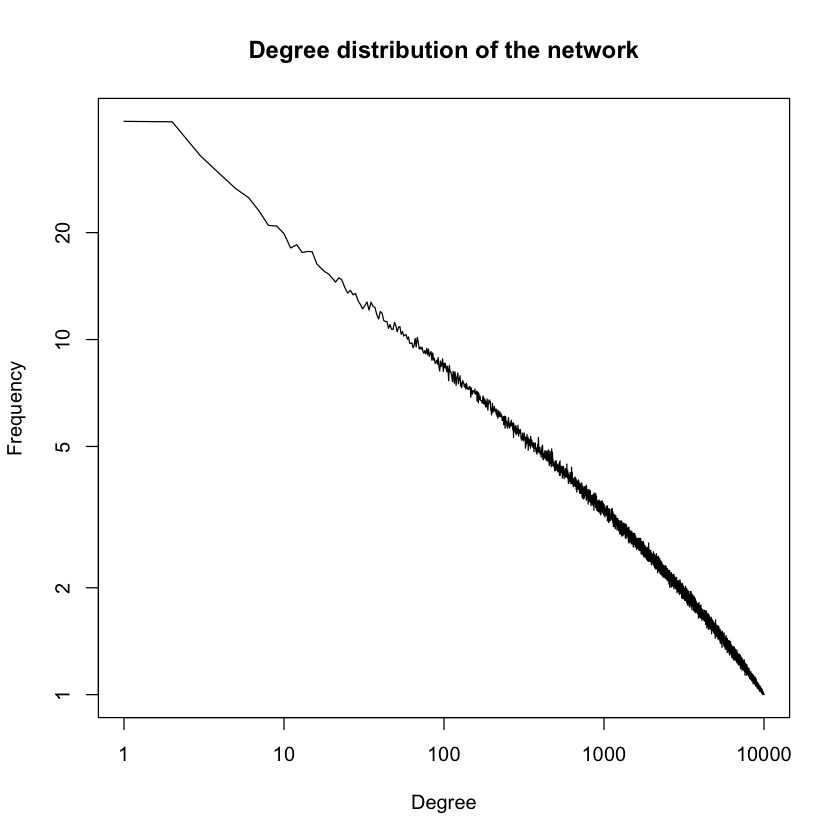

In [6]:
deg_dst_age(1)

Expected modularity : 0.0005336458 


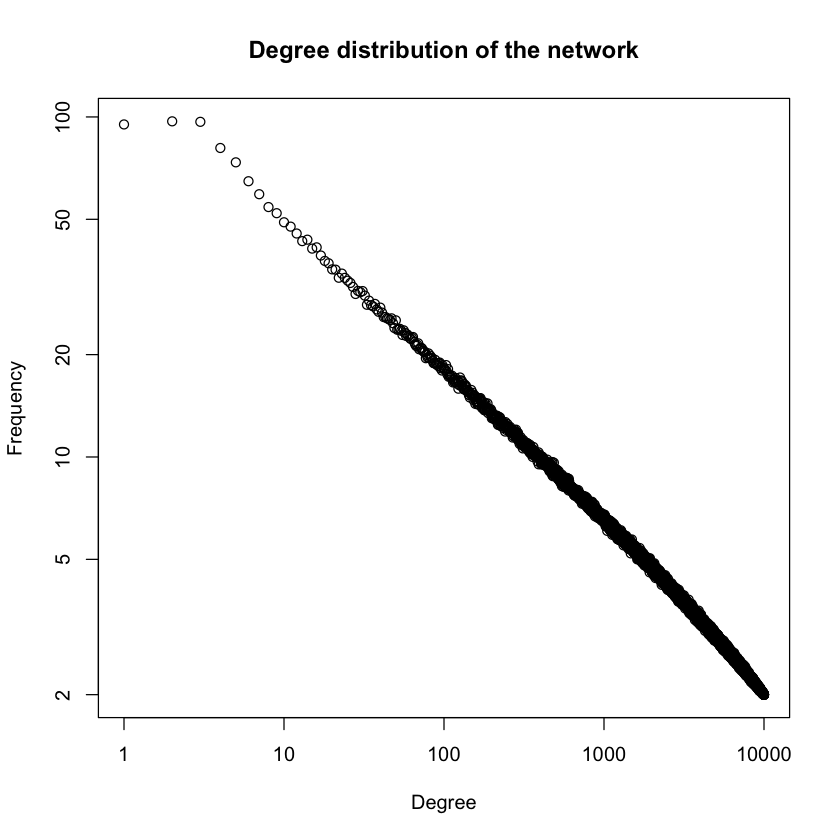

Expected modularity : 0.0002729816 


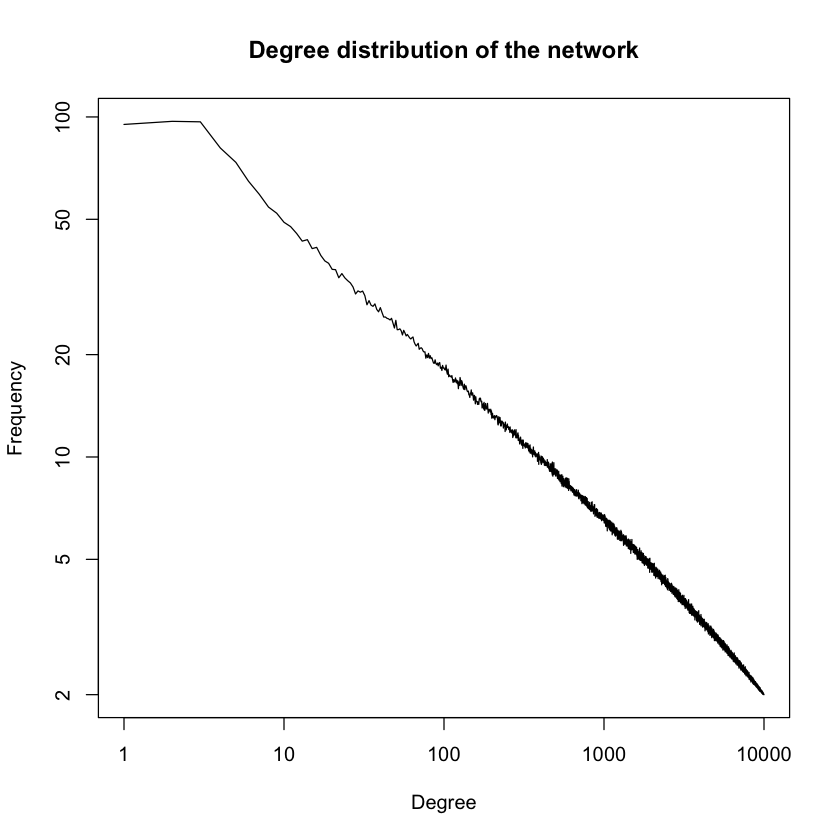

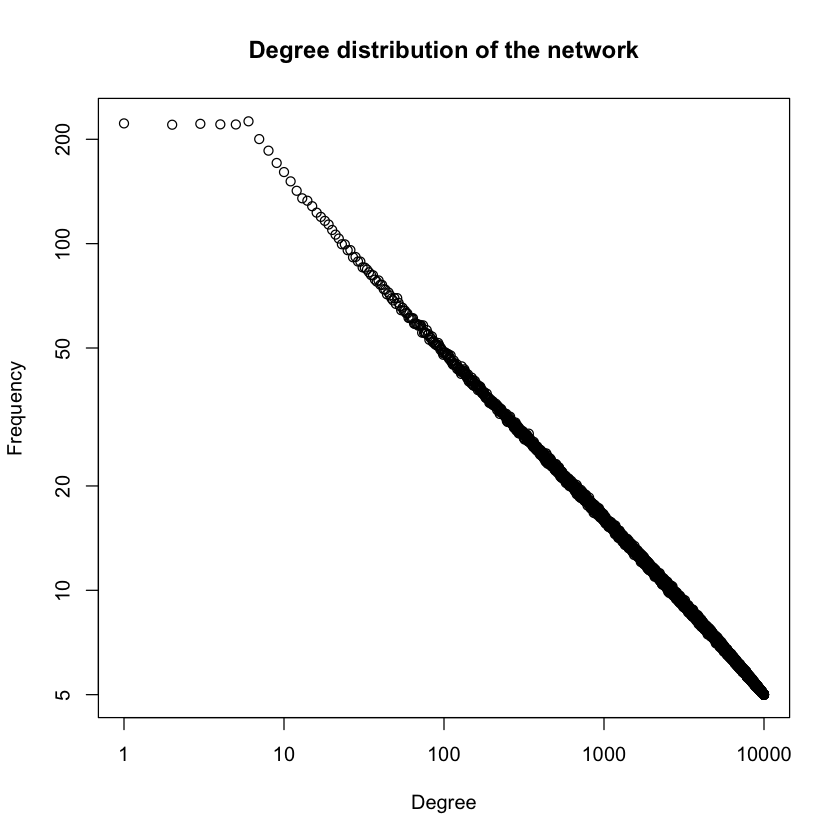

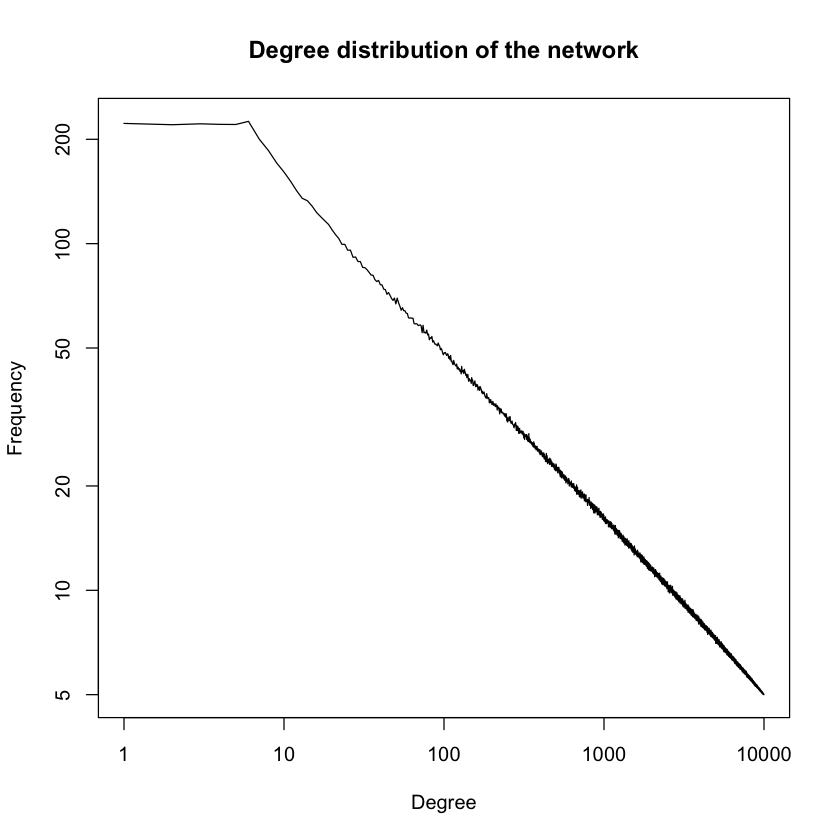

In [7]:
deg_dst_age(2)
deg_dst_age(5)

### G Again, generate a preferential attachment network with n = 1000, m = 1. Take its degree sequence and create a new net- work with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two pro- cedures for creating random power-law networks.

In [8]:
set.seed(12345)
g = barabasi.game(1000, m=1, directed=F)
fg <- fastgreedy.community(g)
modularity(fg)


[1] 0.9357195

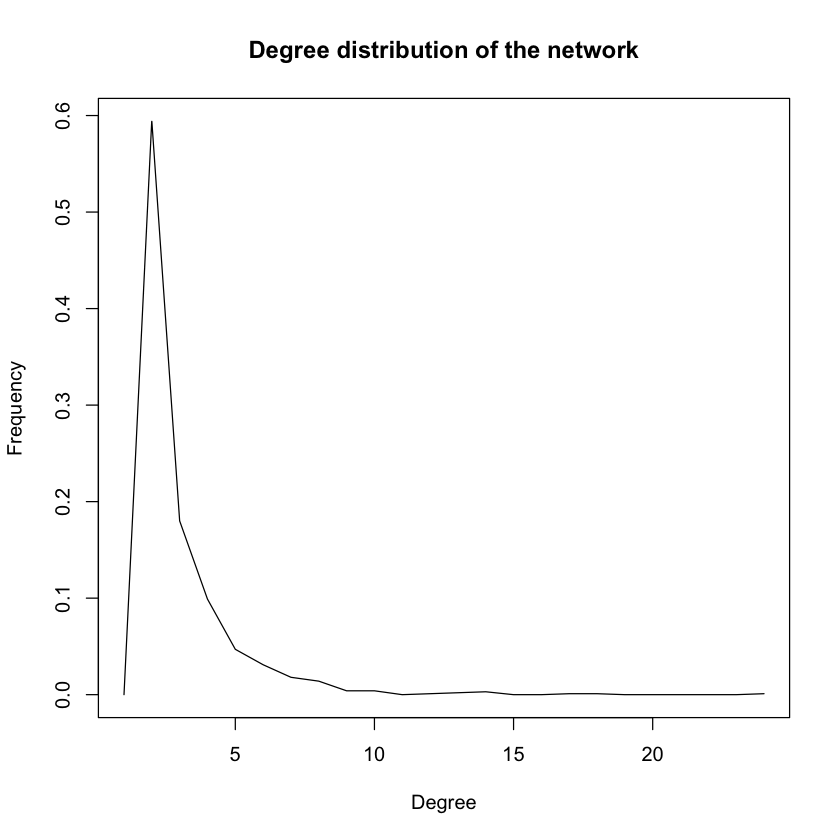

In [12]:
g2 = degree.sequence.game(degree(g),method =c("vl"))
plot(degree.distribution(g2),main="Degree distribution of the network",type = 'l',xlab="Degree",ylab="Frequency")